In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# from lifelines.utils import concordance_index

In [3]:

PATH = '../data/'
data = pd.read_csv('data_from_0010.csv').set_index('user_id')
train = pd.read_csv(PATH+'train.csv').set_index("user_id")

data.fillna(0, inplace=True)
data.drop('count_trans_date_max', axis=1,inplace=True)



data = data.join(train, on="user_id", how="left")
                 
data

,employee_count_nm,customer_age,count_trans_dates,msumm3,count_trans_transaction_amt_sum,mccc0,msumm4,mcc0,mcc12,mcc155,...,msump4,spc5,mcc34,mcc4,spc6,msump6,spc4,mcc110,target,time
user_id,,,,,,,,,,,,,,,,,,,,,
3,4.0,3,106,0.000000,13706.416641,7,0.000000,186108.229797,0.000000,0.000000,...,43075.747864,2,0.000000,0.000000,1,0.000000,3,0.000000,0.0,77.0
9,6.0,3,181,-13289.485764,-323434.666813,0,-104223.187939,0.000000,0.000000,0.000000,...,0.000000,9,0.000000,-1664.872650,23,0.000000,15,0.000000,NaN,NaN
13,5.0,2,168,-16394.193359,-124717.379150,0,-27095.248047,0.000000,31293.108643,0.000000,...,10952.112305,2,0.000000,0.000000,6,86198.161377,3,0.000000,0.0,86.0
37,6.0,2,179,-32719.820328,-331859.599463,2,-41364.700729,10738.788574,0.000000,-2251.359375,...,0.000000,67,0.000000,-126.869576,54,5251.647949,77,0.000000,0.0,89.0
41,4.0,2,153,-8045.445801,-108586.614166,0,-17708.008820,0.000000,0.000000,0.000000,...,0.000000,3,0.000000,0.000000,4,0.000000,4,0.000000,0.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562043,0.0,2,124,0.000000,-29581.256115,0,-142.056610,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0.000000,5,0.000000,1,0.000000,0.0,75.0
562205,0.0,1,179,-10452.779190,-40491.908630,30,-7546.495855,-10868.047920,0.000000,-1563.939163,...,0.000000,33,0.000000,-129.403091,20,0.000000,29,-49.125139,NaN,NaN
562312,0.0,0,158,0.000000,-18537.821270,0,-2644.634823,0.000000,0.000000,-6259.677155,...,0.000000,5,0.000000,-1372.377075,6,0.000000,10,0.000000,0.0,91.0


In [10]:
clients = pd.read_csv(PATH+'clients.csv').set_index("user_id")
clients = clients.join(train, on="user_id", how="left")
clients

,report,employee_count_nm,bankemplstatus,customer_age,target,time
user_id,,,,,,
3,2,ОТ 101 ДО 500,0,3,0.0,77.0
9,1,БОЛЕЕ 1001,0,3,NaN,NaN
13,6,ОТ 501 ДО 1000,0,2,0.0,86.0
37,5,БОЛЕЕ 1001,0,2,0.0,89.0
41,1,ОТ 101 ДО 500,0,2,0.0,57.0
...,...,...,...,...,...,...
562043,12,NaN,0,2,0.0,75.0
562205,12,NaN,0,1,NaN,NaN
562312,12,NaN,0,0,0.0,91.0


/home/andrey/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andrey/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/andrey/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='bankemplstatus', ylabel='Count'>

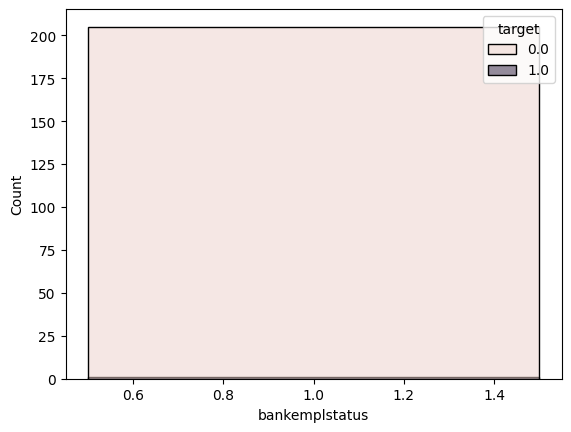

In [34]:
import seaborn as sns

sns.histplot(data = clients.query('bankemplstatus ==1'), x= 'bankemplstatus', hue='target')

In [25]:
clients.query('(bankemplstatus ==1)&(target ==0)')


,report,employee_count_nm,bankemplstatus,customer_age,target,time
user_id,,,,,,
355,12,БОЛЕЕ 1001,1,3,0.0,91.0
1985,8,БОЛЕЕ 1001,1,3,0.0,90.0
2784,1,БОЛЕЕ 1001,1,2,0.0,91.0
7288,8,БОЛЕЕ 1001,1,3,0.0,90.0
9678,11,БОЛЕЕ 1001,1,2,0.0,91.0
...,...,...,...,...,...,...
516351,8,NaN,1,0,0.0,91.0
521469,1,NaN,1,0,0.0,91.0
534033,3,NaN,1,0,0.0,91.0


In [26]:
clients.query('(bankemplstatus ==1)&(target ==1)')

,report,employee_count_nm,bankemplstatus,customer_age,target,time
user_id,,,,,,
343868,9,ОТ 11 ДО 30,1,0,1.0,88.0


In [27]:
206/96000

0.0021458333333333334